# Import and Setup

In [16]:
import datetime as dt
import pandas as pd
import numpy as np
import glob
from matplotlib.ticker import MultipleLocator
from pynverse import inversefunc
import datetime as dt

In [17]:
import matplotlib.pyplot as plt
plt.style.use('../../style.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [18]:
import sys
sys.path.insert(0, '../../../purity-monitor/')
sys.path.insert(0, '../../WaveformAnalysis/')
import Dataset as Dataset
import StandMonitor as Monitor
import PlotFunctions as Plt

In [19]:
import importlib
importlib.reload(Dataset)
importlib.reload(Monitor)
importlib.reload(Plt)

<module 'PlotFunctions' from '../../WaveformAnalysis\\PlotFunctions.py'>

# Data Read-In

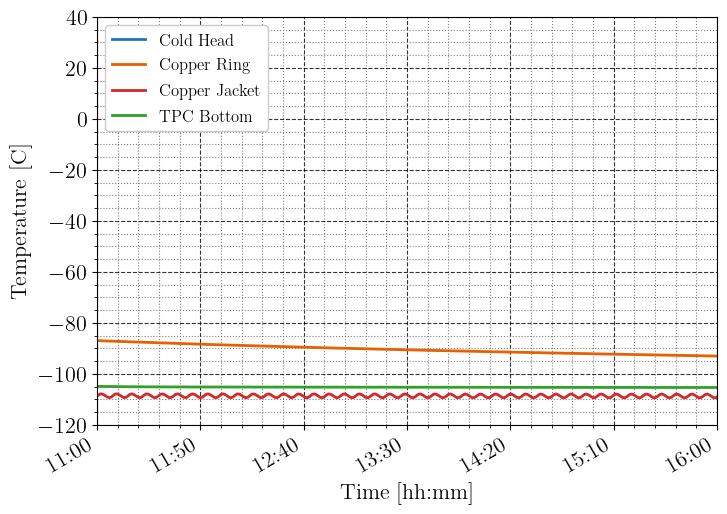

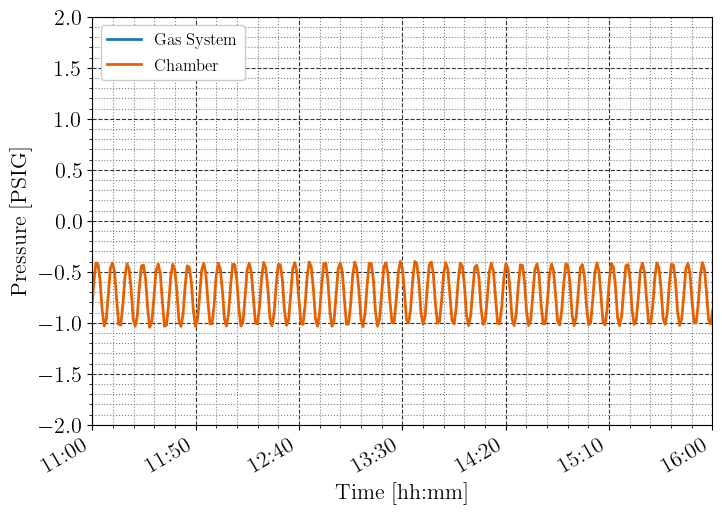

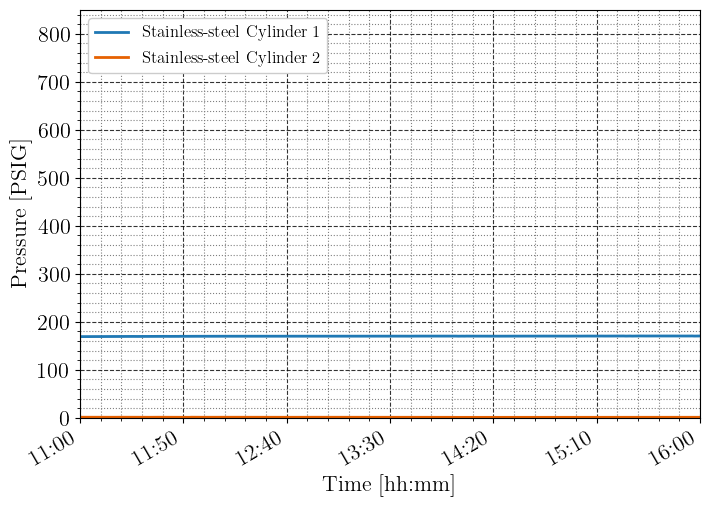

In [97]:
Sensors = []
# Files = ['C:/Data/StandStatus/20220116.h5','C:/Data/StandStatus/20220117.h5','C:/Data/StandStatus/20220118.h5']
Files = ['C:/Data/StandStatus/20220203.h5']
for File in Files: 
    Sensor = Monitor.SensorData(Filepath=File)
    Sensor.GetData()
    Sensors.append(Sensor)

AllSensors = Monitor.SensorData()
AllSensors.Combine(Sensors)
XRange = [dt.datetime(2022,2,3,11,0), dt.datetime(2022,2,3,16,0)]

AllSensors.PlotData(Data=AllSensors.Temp, Selection='Temperature', XTicks=50, YTicks=20, XRange=XRange, YRange=[-120,40], Bin=120)
AllSensors.PlotData(Data=AllSensors.SPressure, Selection='System Pressure', XTicks=50, YTicks=0.5, XRange=XRange, YRange=[-2,2], Bin=120)
AllSensors.PlotData(Data=AllSensors.XPressure, Selection='Xenon Pressure', XTicks=50, YTicks=100, XRange=XRange, YRange=[0,850], Bin=120)

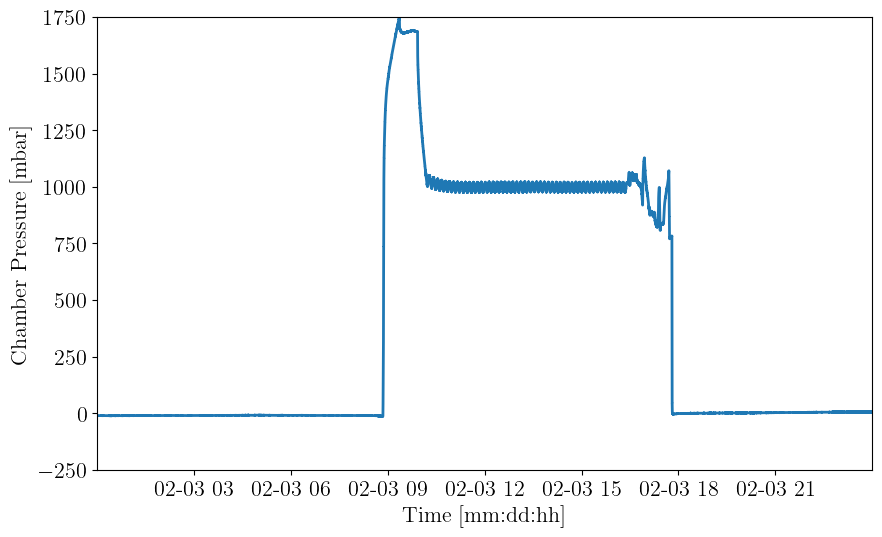

In [134]:
pressure=[]
pressure_psig=[]
time=[]
for vals in AllSensors.Time:
    time.append(vals)
for values in AllSensors.SPressure[1]:
    pressure.append((values+14.7)/0.014)
    pressure_psig.append(values)

plt.figure(figsize=(10,6))
plt.plot(time,pressure)
# plt.ylim(-2,2)
plt.xlabel('Time [mm:dd:hh]')
plt.ylabel('Chamber Pressure [mbar]')
plt.show()

In [99]:
lg = np.loadtxt("C:\\Users\\nEXO\\Downloads\\xenon_phase\\xenon_phase\\xenon_phase_liq_gas.txt", delimiter=",", skiprows=1)
ls = np.loadtxt("C:\\Users\\nEXO\\Downloads\\xenon_phase\\xenon_phase\\xenon_phase_liq_sol.txt", delimiter=",", skiprows=1)

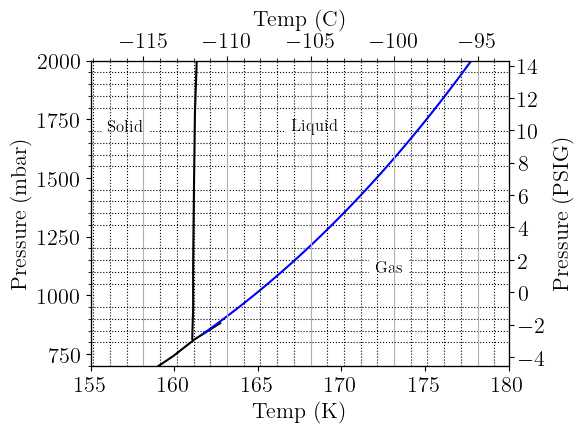

In [100]:
fig, ax1 = plt.subplots()

gpts = lg[:,0] < 163
plt.plot( lg[gpts,0], lg[gpts,1]*1000, 'k', lw=1.5)
plt.plot( ls[:,0], ls[:,1]*1000, 'k', lw=1.5)

t = np.linspace(161.7, 184.7, 100)
p = 10**(3.80675-(577.661/(t-13.0)))*1000

plt.plot(t, p, 'b', lw=1.5)
plt.ylim([700, 2000])
plt.xlim([155, 180])
plt.xlabel("Temp (K)")
plt.ylabel("Pressure (mbar)")

h1=plt.text(156, 1700, "Solid", backgroundcolor='white')
h2=plt.text(167, 1700, "Liquid", backgroundcolor='white')
h3=plt.text(172, 1100, "Gas", backgroundcolor='white')

ml2 = MultipleLocator(50)
ax1.yaxis.set_minor_locator(ml2)
ax1.yaxis.grid(b=True, which='minor', color='k', linestyle=':')
ax1.set_axisbelow(True)

ax2 = ax1.twiny()
ax2.plot(t-273.15, p, lw=0)

ax2.set_axisbelow(True)
plt.ylim([700, 2000])
plt.xlim([155-273.15, 180-273.15])
plt.xlabel("Temp (C)")

plt.grid()
ml = MultipleLocator(1)
ax2.xaxis.set_minor_locator(ml)
ax2.xaxis.grid(b=True, which='minor', color='k', linestyle=':')



ax3 = ax1.twinx()
ax3.plot(t, p*0.0145038 -14.70, lw=0)
plt.ylim([700*0.0145038-14.70, 2000*0.0145038-14.70])
plt.xlim([155, 180])
ax3.set_axisbelow(True)
plt.ylabel("Pressure (PSIG)")
ax3.set_yticks([-4,-2,0,2,4,6,8,10,12,14])

fig.set_size_inches(6,4.5)
plt.tight_layout()
plt.savefig("xenon_phase_zoom.pdf")

plt.show()

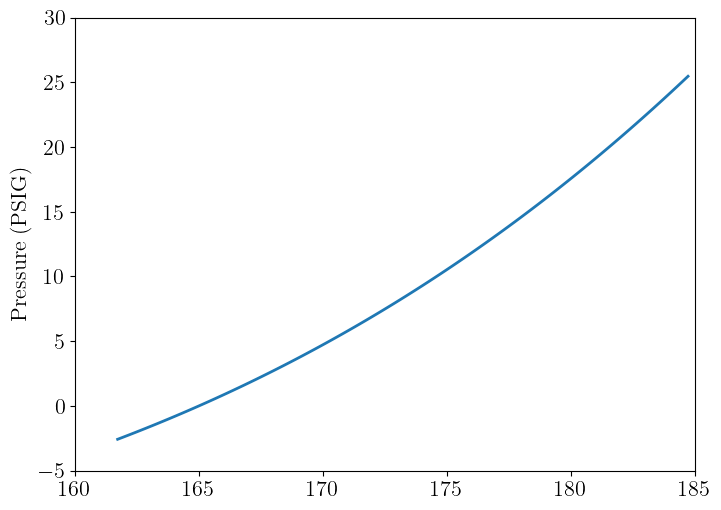

In [101]:
t = np.linspace(161.7, 184.7, 100)
def pres(x):
    return 10**(3.80675-(577.661/(x-13.0)))*1000

plt.plot(t,pres(t)*0.0145038 -14.70)
plt.ylabel("Pressure (PSIG)")
# plt.xticks([-4,-2,0,2,4,6,8,10,12,14])
plt.show()


In [102]:
def temp(p):
    return (577/((3.8)-(np.log10((p*0.014-14.7)*0.001))))+13

In [105]:
def numeric_temp(p_input):
    x=np.linspace(161,180,1000)
    p=10**(3.80675-(577.661/(x-13.0)))*1000 #pressure in mbar when x is in Kelvin
    t=np.interp(p_input,p,x)
    return t


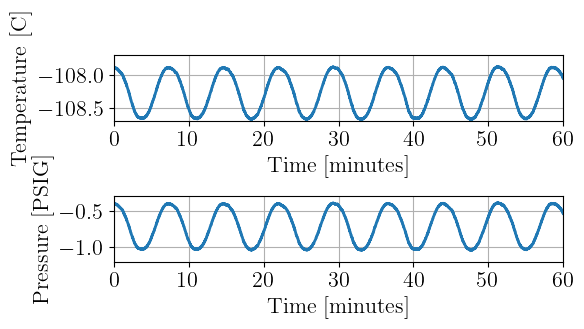

1439.9886909833333
696.99458885


In [184]:
pres_values=np.array(pressure)

temp_values=numeric_temp(pres_values)
time_start=str(time[0])
time_end=str(time[-1])
time_interval_minutes=(dt.datetime.strptime(time_end,'%Y-%m-%d %H:%M:%S.%f')-dt.datetime.strptime(time_start,'%Y-%m-%d %H:%M:%S.%f')).total_seconds()/60
time_start_exp='2022-02-03 11:37:00.00'
time_end_exp='2022-02-03 16:10:00.00'
time_interval_exp=(dt.datetime.strptime(time_start_exp,'%Y-%m-%d %H:%M:%S.%f')-dt.datetime.strptime(time_start,'%Y-%m-%d %H:%M:%S.%f')).total_seconds()/60
plt.figure(figsize=(6,3))
plt.subplot(2,1,1)
plt.plot(np.linspace(time_interval_exp-time_interval_minutes,time_interval_exp,len(time)),temp_values-273,lw=2)
plt.ylim(-108.7,-107.7)
# plt.ylim(-107.7,-108.7)
# plt.ylim(-111,-107)
plt.xlim(0,60)
plt.grid()
plt.xlabel('Time [minutes]')
plt.ylabel('Temperature [C]')
plt.subplot(2,1,2)
plt.plot(np.linspace(time_interval_exp-time_interval_minutes,time_interval_exp,len(time)),pressure_psig,lw=2)
plt.ylim(-1.2,-0.3)
plt.xlim(0,60)
plt.grid()
plt.xlabel('Time [minutes]')
plt.ylabel('Pressure [PSIG]')
plt.tight_layout()
plt.savefig('temp_pres.pdf')
plt.show()
print(time_interval_minutes)
print(time_interval_exp)